In [1]:
#Importo
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Leo
df= pd.read_csv("CSV/siniestos.csv")
df.head(3)

,Id,Fecha,Año,Mes,Día,Día semana,Hora completa,Hora,Num víctimas,Participantes,...,Fecha fallecimiento,Lugar del hecho,Tipo de calle,Calle,Cruce,Dirección normalizada,Comuna,Xy (caba),Pos x,Pos y
0,2016-0001,2016-01-01,2016,1,1,Viernes,04:00:00,4.0,1,MOTO-AUTO,...,2016-01-01,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022
1,2016-0002,2016-01-02,2016,1,2,Sabado,01:15:00,1.0,1,AUTO-PASAJEROS,...,2016-01-02,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709
2,2016-0003,2016-01-03,2016,1,3,Domingo,07:00:00,7.0,1,MOTO-AUTO,...,2016-01-03,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362


In [3]:
#Busco informacion general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     717 non-null    object 
 1   Fecha                  717 non-null    object 
 2   Año                    717 non-null    int64  
 3   Mes                    717 non-null    int64  
 4   Día                    717 non-null    int64  
 5   Día semana             717 non-null    object 
 6   Hora completa          717 non-null    object 
 7   Hora                   716 non-null    float64
 8   Num víctimas           717 non-null    int64  
 9   Participantes          717 non-null    object 
 10  Rol                    717 non-null    object 
 11  Acusado                717 non-null    object 
 12  Victima                717 non-null    object 
 13  Sexo                   717 non-null    object 
 14  Edad                   717 non-null    int64  
 15  Rango 

# duplicados

In [4]:
#Busco duplicados
duplicados = df.duplicated().sum()
duplicados
#No hay duplicados

0

Outliers y valores faltantes me fijo con el ETL

# CORRELACION

Los valores que estan poco correlacionados, el que mas podria correlacionar es la Edad con la Hora

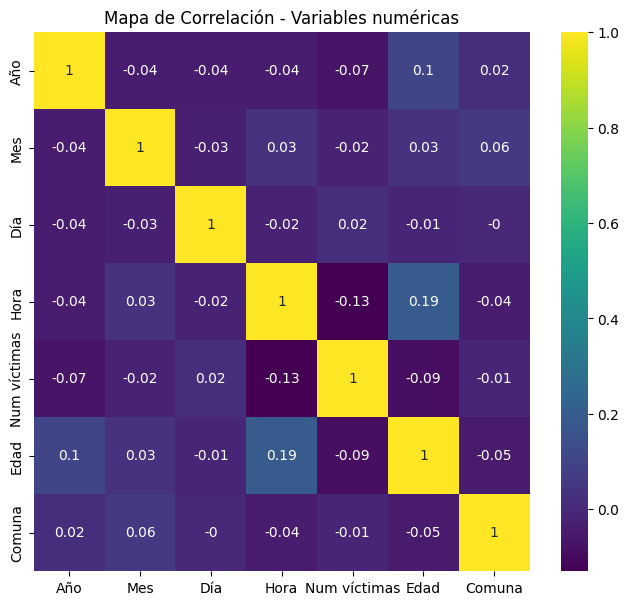

In [5]:
# Generamos un mapa de calor con las correlaciones de todos los datos que contengan números 
dataNumerica = df.select_dtypes(include=["number"]) 
corr = dataNumerica.corr().round(2)

plt.figure(figsize=(8,7))
sns.heatmap(corr, cmap="viridis", annot=True)
plt.title("Mapa de Correlación - Variables numéricas")
plt.show()

In [6]:
#Informacion de numero de victimas
df["Num víctimas"].describe()

count    717.000000
mean       1.061367
std        0.257024
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: Num víctimas, dtype: float64

#   Valores de las cantidad de victimas que puede tomar

Lo mas normal es que sea 1 victima 

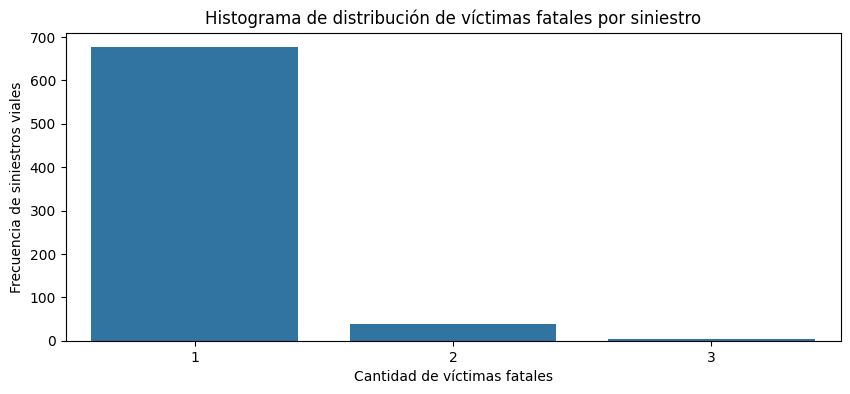

In [7]:
plt.figure(figsize=(10, 4))
# se filtran los valores sin datos o nulos 
df_filtrado = df[df["Num víctimas"] != 0]

#Se cuentan los datos de la columna y se calcula la frecuencia en que se distribuye
sns.countplot(df_filtrado, x="Num víctimas")

plt.ylabel("Frecuencia de siniestros viales")
plt.xlabel("Cantidad de víctimas fatales")
plt.title("Histograma de distribución de víctimas fatales por siniestro")

plt.show()

In [8]:
# Agrupar por año y mes, y sumar el número de víctimas
rel_tiempo = df.groupby(["Año", "Mes"])["Num víctimas"].sum().reset_index()
rel_tiempo

,Año,Mes,Num víctimas
0,2016,1,8
1,2016,2,12
2,2016,3,15
3,2016,4,11
4,2016,5,7
...,...,...,...
67,2021,8,9
68,2021,9,4
69,2021,10,5
70,2021,11,8


#   Victimas por Año

El numero de victimas se disparo en 2021.

En el año 2020 no habia tanto transito por la Pandemia.

In [9]:
# Combinar AÑO y MES para obtener una sola variable de tiempo, creando la columna "Fecha" como str
rel_tiempo["Fecha"] = rel_tiempo["Año"].astype(str) + "-" + rel_tiempo["Mes"].astype(str)

# Convertir la variable de tiempo a formato datetime
rel_tiempo["Fecha"] = pd.to_datetime(rel_tiempo["Fecha"])

# Ordenar el DataFrame por fecha para que tenga orden cronológico
rel_tiempo = rel_tiempo.sort_values("Fecha")

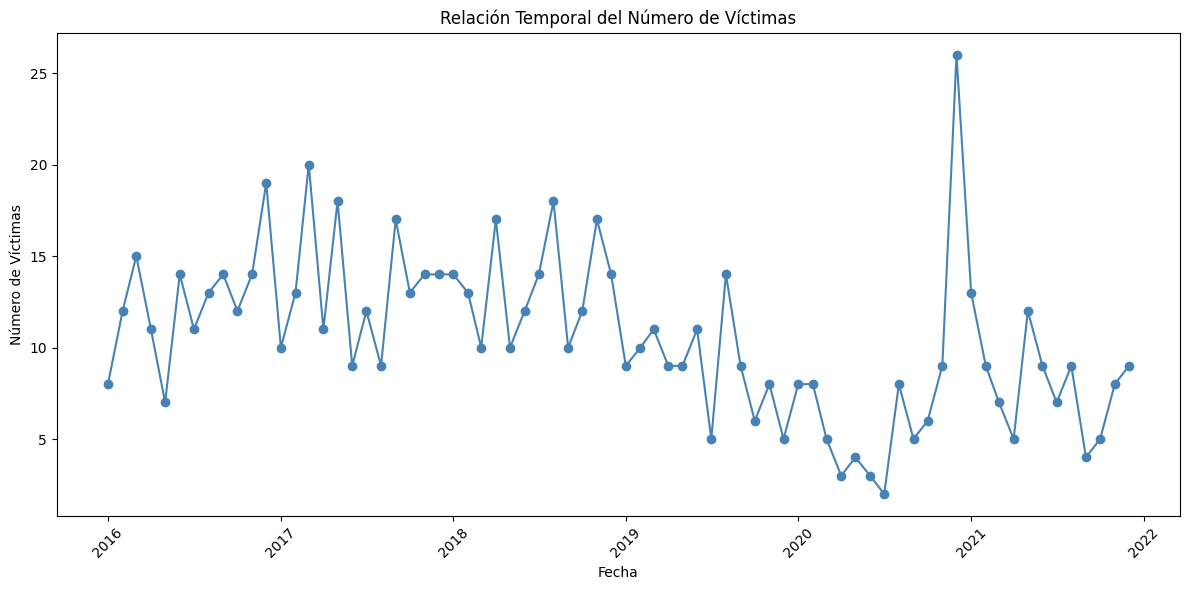

In [10]:
# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(rel_tiempo["Fecha"], rel_tiempo["Num víctimas"], marker="o", color="steelblue")

# Añadir títulos y etiquetas
plt.title("Relación Temporal del Número de Víctimas")
plt.xlabel("Fecha")
plt.ylabel("Número de Víctimas")

# Rotar las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Edad Victima

En una visualización en general se puede observar que el 75% de las víctimas fatales es menor que 55 años, la mediana es de 39 años.

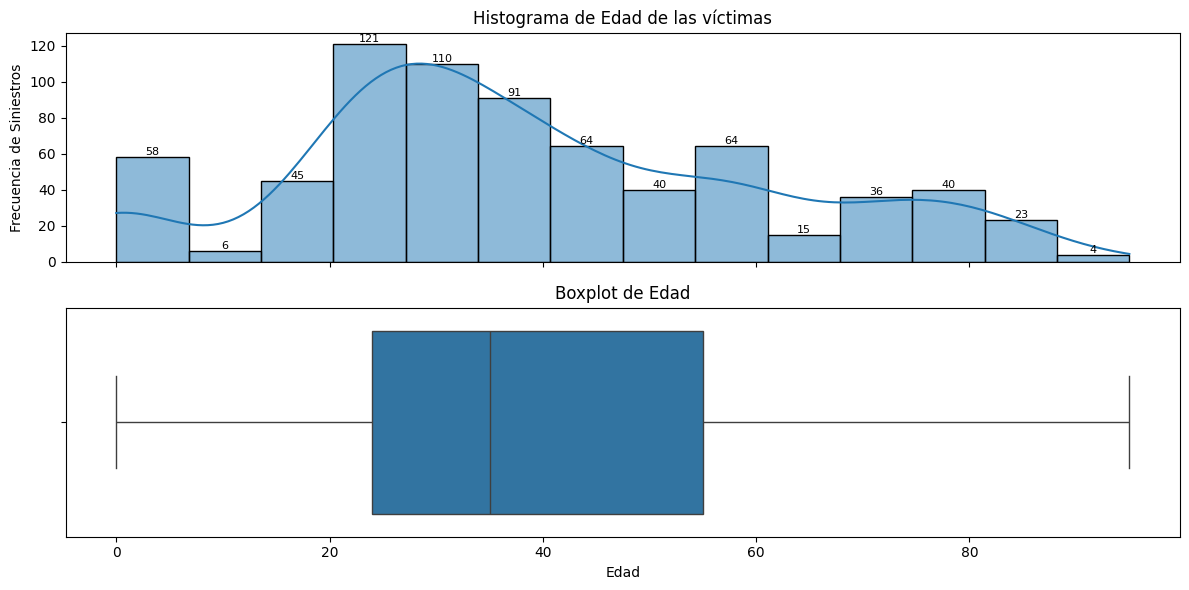

In [11]:
# Se crea una figura con un solo eje x compartido para tener dos gráficos en uno
fig, ax = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

# Se grafica el histograma de la edad
sns.histplot(df["Edad"], kde=True, ax=ax[0]) #se agrega la línea de suavizado
ax[0].set_title("Histograma de Edad de las víctimas") ; ax[0].set_ylabel("Frecuencia de Siniestros")

# Agregar etiquetas de datos en el histograma
for p in ax[0].patches:
    ax[0].annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center", va="bottom", fontsize=8, color="black")

# Se grafica el boxplot de la edad
sns.boxplot(x=df["Edad"], ax=ax[1])
ax[1].set_title("Boxplot de Edad") ; ax[1].set_xlabel("Edad")

# Se ajusta y muestra el gráfico
plt.tight_layout()
plt.show()

In [12]:
df["Edad"].describe()

count    717.000000
mean      39.050209
std       22.010669
min        0.000000
25%       24.000000
50%       35.000000
75%       55.000000
max       95.000000
Name: Edad, dtype: float64

# Victimas por Genero

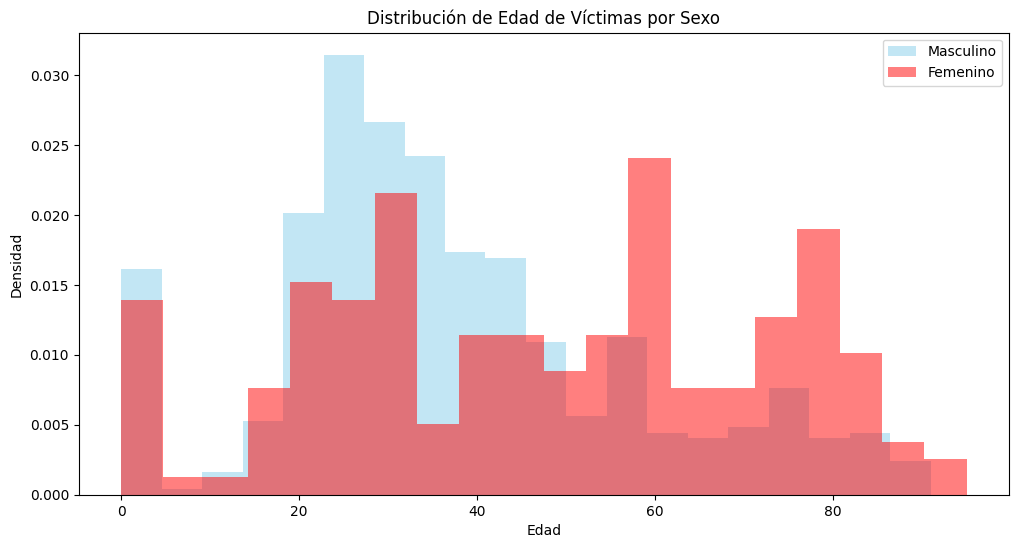

In [13]:
# Filtrar por sexo masculino
masculino = df[df["Sexo"] == "MASCULINO"]["Edad"].dropna()

# Filtrar por sexo femenino
femenino = df[df["Sexo"] == "FEMENINO"]["Edad"].dropna()

# Crear el histograma
plt.figure(figsize=(12, 6))
plt.hist(masculino, bins=20, alpha=0.5, color="skyblue", label="Masculino", density=True)
plt.hist(femenino, bins=20, alpha=0.5, color="red", label="Femenino", density=True)
plt.title("Distribución de Edad de Víctimas por Sexo")
plt.xlabel("Edad")
plt.ylabel("Densidad")
plt.legend()
plt.show()

# Distribución de los Tipos de Calles donde suceden los siniestros

La avenida es el lugar mas peligroso, super por mucho los otros tipos de calles.

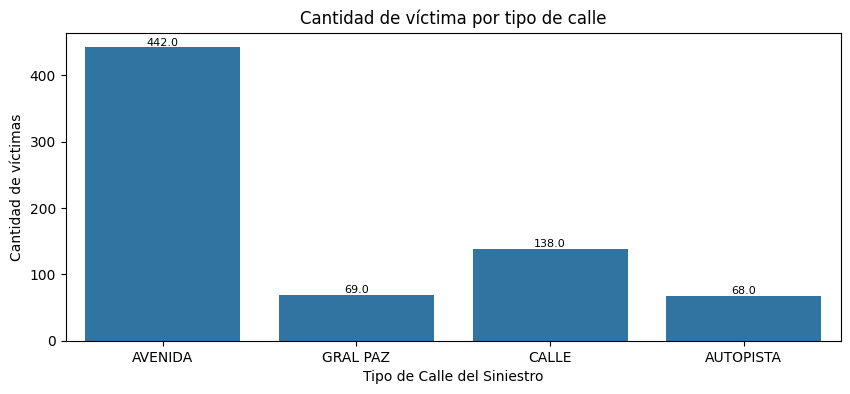

In [14]:
#Se crea el gráfico de barras
plt.figure(figsize=(10, 4))

ax=sns.countplot(df, x="Tipo de calle")

# Agrega el número de víctimas en las barras
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()), ha="center", va="bottom", fontsize=8)

#Se titulan los ejes
plt.xlabel("Tipo de Calle del Siniestro")
plt.ylabel("Cantidad de víctimas")
plt.title("Cantidad de víctima por tipo de calle")

plt.show()

# Distribución de Participantes en los siniestros

Los participantes en mas peligro son por obvias razones "Peaton-Pasajero".

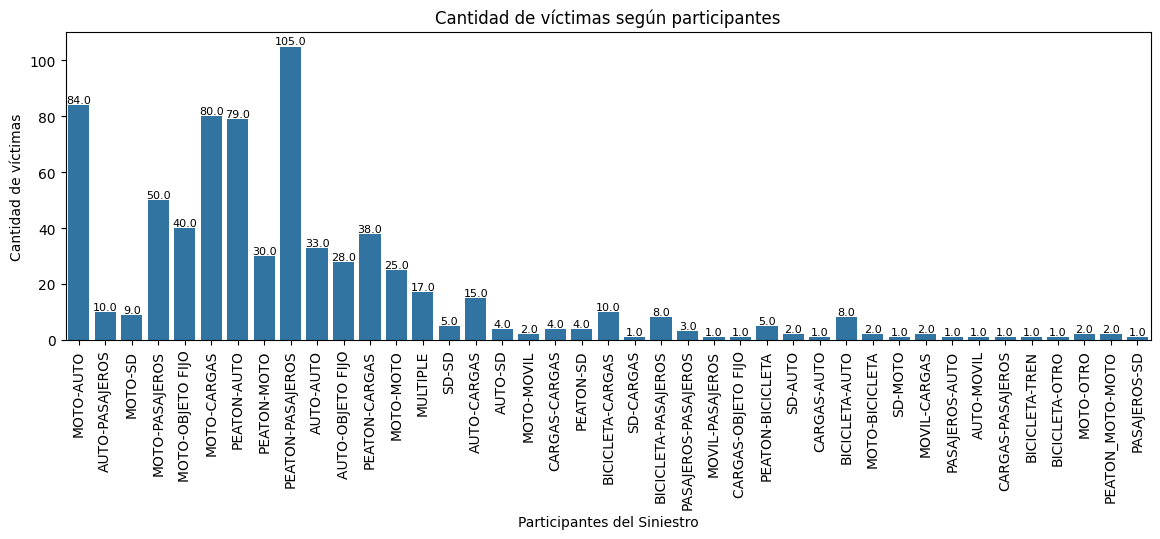

In [15]:
#Se crea el gráfico de barras
plt.figure(figsize=(14, 4))

ax=sns.countplot(df, x="Participantes")

# Agrega el número de víctimas en las barras
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()), ha="center", va="bottom", fontsize=8)

#Se ubican los titulos de las barras en 90 grados
plt.xticks(rotation=90)

#Se titulan los ejes
plt.xlabel("Participantes del Siniestro")
plt.ylabel("Cantidad de víctimas")
plt.title("Cantidad de víctimas según participantes")

plt.show()

# Distribución de Acusados en los siniestros

Los autos son los mas Acusados

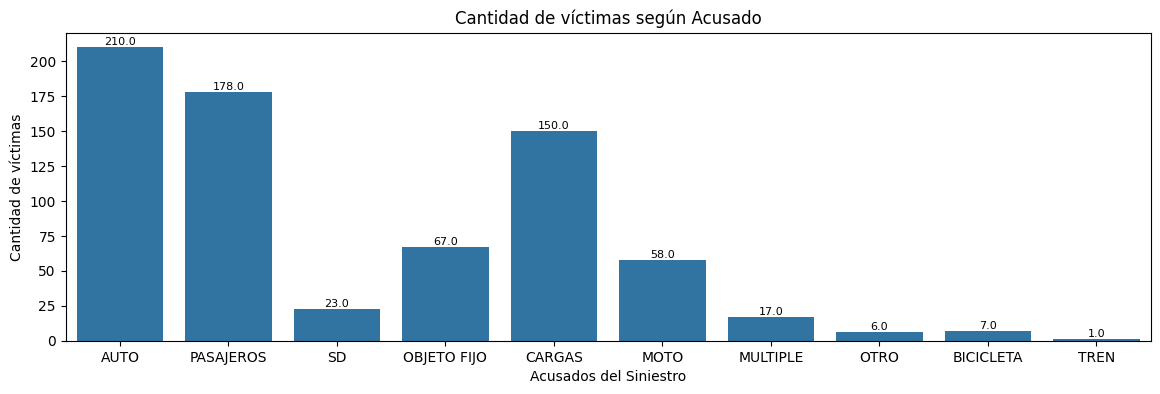

In [16]:
#Se crea el gráfico de barras
plt.figure(figsize=(14, 4))

ax=sns.countplot(df, x="Acusado")

# Agrega el número de víctimas en las barras
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()), ha="center", va="bottom", fontsize=8)


#Se titulan los ejes
plt.xlabel("Acusados del Siniestro")
plt.ylabel("Cantidad de víctimas")
plt.title("Cantidad de víctimas según Acusado")

plt.show()

# % DE VICTIMAS MASCULINA Y FEMENINA

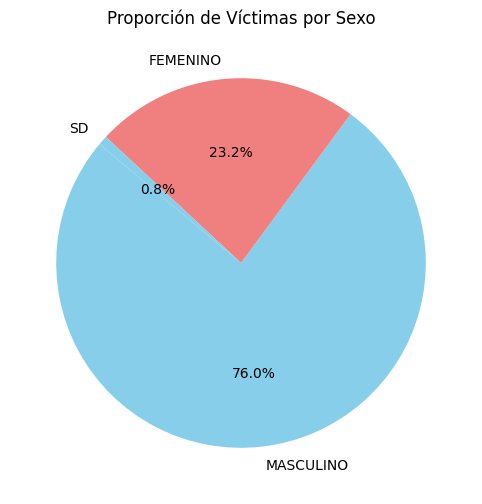

In [17]:
# Calcular la proporción de víctimas por sexo
proporcion = df["Sexo"].value_counts(normalize=True) * 100

# Preparar los datos para el gráfico de torta
labels = proporcion.index
sizes = proporcion.values

# Crear el gráfico de torta
plt.figure(figsize=(12, 6))

# Gráfico de torta

plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=140, colors=["skyblue", "lightcoral"])
plt.title("Proporción de Víctimas por Sexo")
plt.show()

# Muertes por COMUNA

La comuna con mas muertes es la 1 y la que tiene menos muertes es la 5 (en el PowerBI muestro razones)

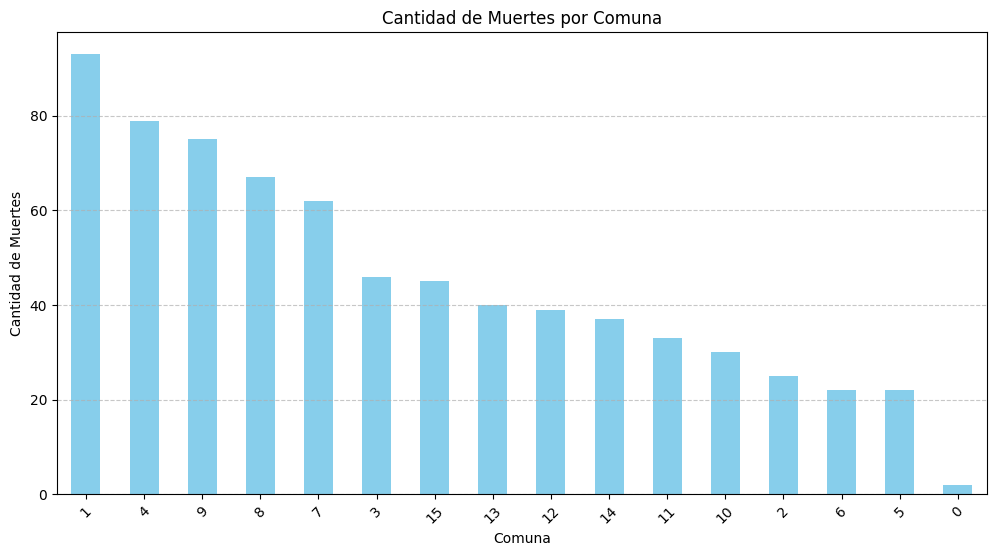

In [30]:
#Grafico

plt.figure(figsize=(12, 6))
df['Comuna'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Comuna')
plt.ylabel('Cantidad de Muertes')
plt.title('Cantidad de Muertes por Comuna')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()